<a href="https://colab.research.google.com/github/Soumiyads2004/FODS_54/blob/main/Exp3FODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EX3 -EDA (Exploratory Data Analysis)**

# ***1. Data Understanding and Summary Statistics***




In [4]:
import pandas as pd

In [5]:
df=pd.read_excel('/eda_payroll_dataset_batch2.xlsx')
df.info() #df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employee_ID     1000 non-null   object 
 1   Name            1000 non-null   object 
 2   Department      1000 non-null   object 
 3   Position        1000 non-null   object 
 4   Base_Salary     799 non-null    float64
 5   Bonus           810 non-null    float64
 6   Overtime_Hours  896 non-null    float64
 7   Overtime_Pay    920 non-null    float64
 8   Tax_Deductions  905 non-null    float64
 9   Net_Salary      1000 non-null   float64
dtypes: float64(6), object(4)
memory usage: 78.2+ KB


In [7]:
df.head(10)

,Employee_ID,Name,Department,Position,Base_Salary,Bonus,Overtime_Hours,Overtime_Pay,Tax_Deductions,Net_Salary
0,E0001,Grace,HR,Engineer,NaN,4163.33,19.0,4380.96,4613.84,74583.16
1,E0002,David,HR,Engineer,65764.33,9394.54,49.0,3613.92,11611.08,67161.71
2,E0003,Eva,HR,Engineer,38406.72,5648.91,42.0,1159.21,7652.41,37562.43
3,E0004,Grace,Marketing,Executive,69696.49,9426.69,26.0,3527.81,7330.79,75320.20
4,E0005,Charlie,Sales,Manager,47604.83,2594.60,40.0,1538.51,2586.10,49151.84
5,E0006,Hannah,Marketing,Analyst,46805.10,7394.40,15.0,1210.87,1512.43,53897.94
6,E0007,Eva,Sales,Clerk,38463.25,6363.87,33.0,365.02,3980.28,41211.86
7,E0008,Eva,Marketing,Analyst,62100.39,7524.38,31.0,NaN,5993.73,67351.18
8,E0009,Grace,Marketing,Analyst,98173.37,2539.34,25.0,NaN,13498.53,90769.18
9,E0010,Bob,Engineering,Manager,54879.75,6817.45,24.0,NaN,15805.09,47064.61


In [8]:
df.describe()

,Base_Salary,Bonus,Overtime_Hours,Overtime_Pay,Tax_Deductions,Net_Salary
count,799.000000,810.000000,896.000000,920.000000,905.000000,1000.000000
mean,78035.855594,5268.840037,24.863839,2500.626250,15251.390055,67947.263400
std,36142.587414,2726.964633,14.059705,1428.004028,8402.407227,27890.284223
min,30016.960000,512.790000,0.000000,10.380000,1018.200000,4428.430000
25%,51702.205000,2907.430000,13.000000,1276.012500,7979.770000,45452.717500
50%,77453.870000,5313.710000,24.000000,2522.685000,15428.350000,68887.255000
75%,98615.635000,7623.840000,37.000000,3732.297500,22124.250000,90716.725000
max,344143.560000,9977.420000,49.000000,4995.250000,29995.630000,125430.250000


In [9]:
miss=df.isnull().mean()*100
miss

,0
Employee_ID,0.0
Name,0.0
Department,0.0
Position,0.0
Base_Salary,20.1
Bonus,19.0
Overtime_Hours,10.4
Overtime_Pay,8.0
Tax_Deductions,9.5
Net_Salary,0.0


# ***Data Visualization***

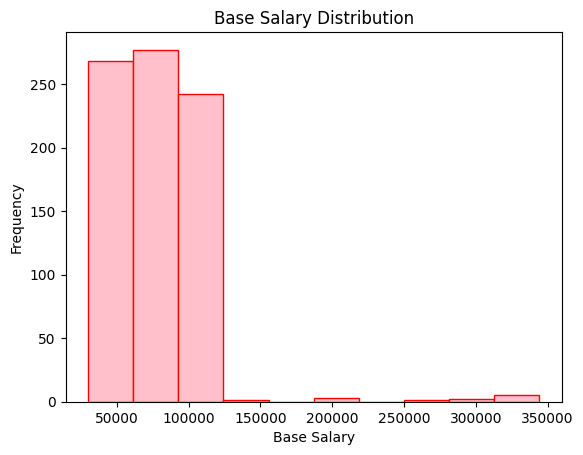

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['Base_Salary'], color='Pink', edgecolor='Red')
plt.title('Base Salary Distribution')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.show()

<Axes: >

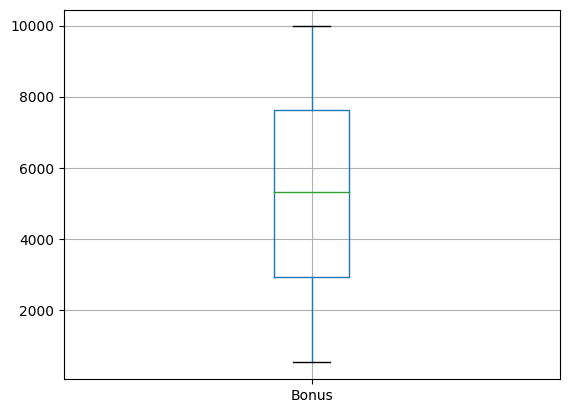

In [11]:
df.boxplot('Bonus')


In [12]:
q1=df['Bonus'].quantile(0.25)
q2=df['Bonus'].quantile(0.75)
IQR=q2-q1

In [15]:
lb=q1-1.5*IQR
ub=q2+1.5*IQR


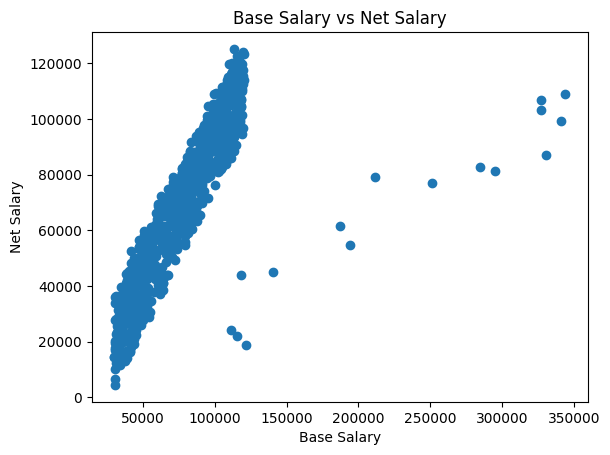

In [16]:
plt.scatter(df['Base_Salary'],df['Net_Salary'])
plt.title('Base Salary vs Net Salary')
plt.xlabel('Base Salary')
plt.ylabel('Net Salary')
plt.show()

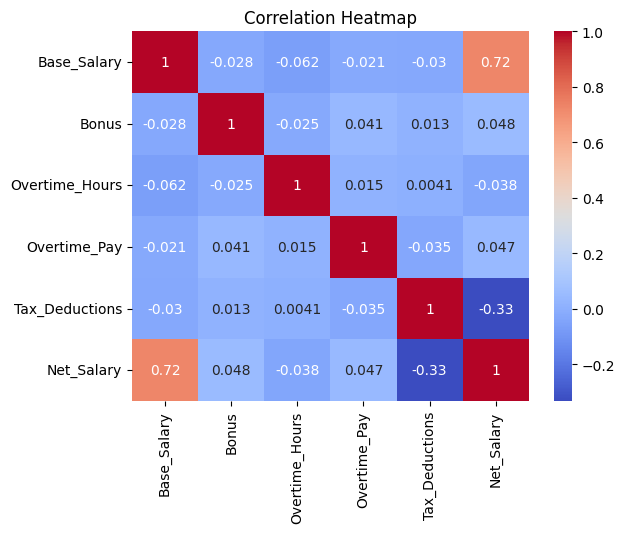

In [18]:
import seaborn as sns

# Calculate the correlation matrix, considering only numeric columns
corr = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ***Advanced Data Visualization and Insights***




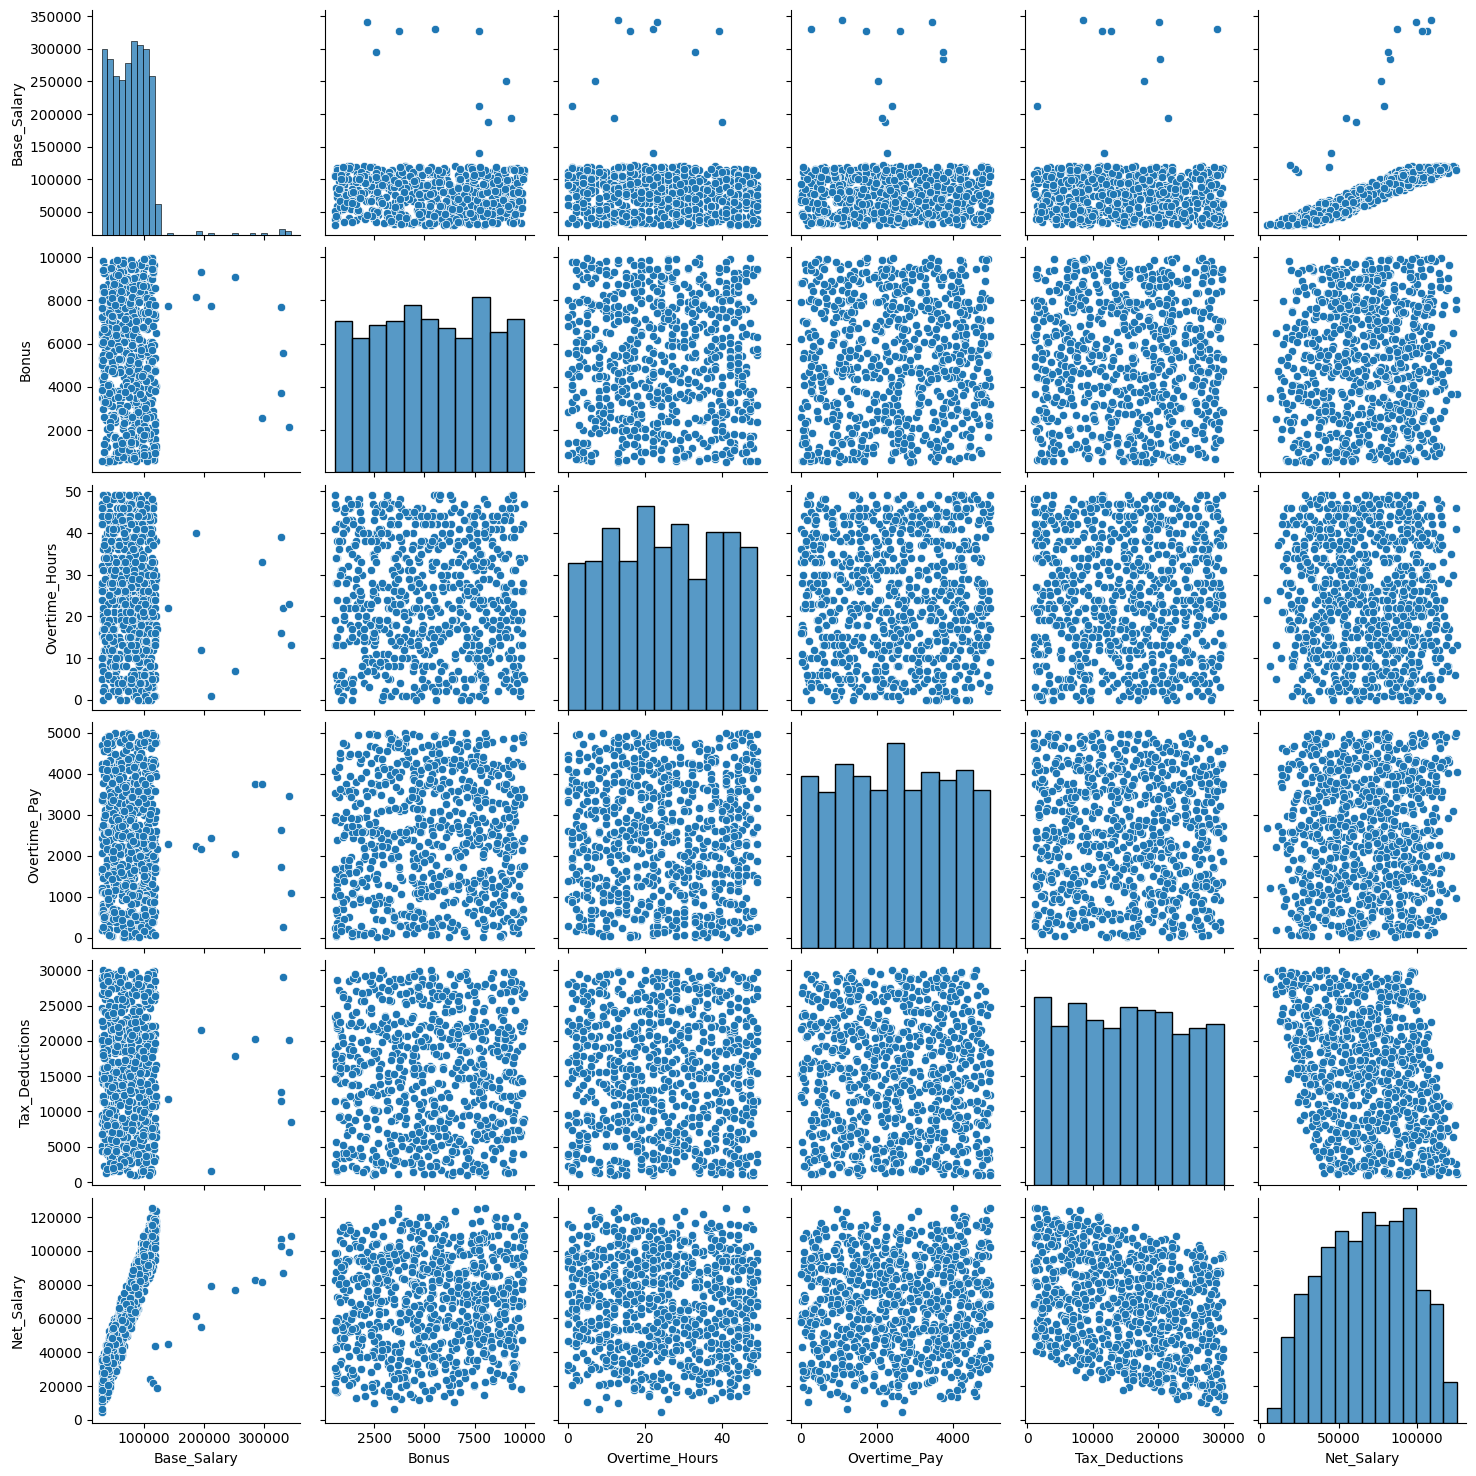

In [19]:
# prompt: Create a pair plot for the numeric columns in the dataset.

sns.pairplot(df.select_dtypes(include=['number']))
plt.show()


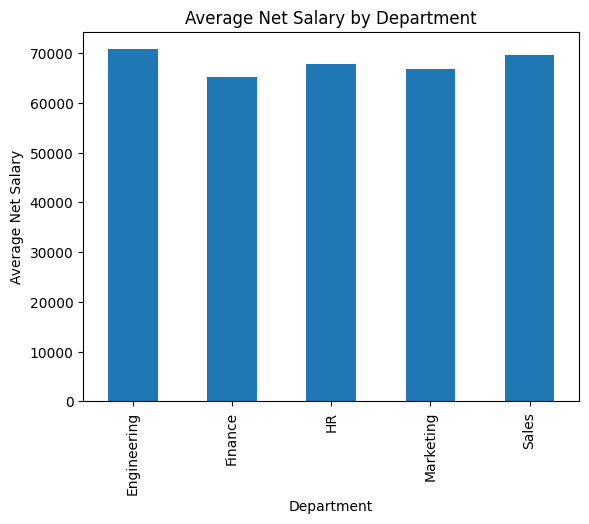

In [20]:
# prompt: Generate a bar plot showing the average &#39;Net_Salary&#39; for each &#39;Department&#39; in the
# dataset.

# Group the data by 'Department' and calculate the average 'Net_Salary'
avg_salary_by_dept = df.groupby('Department')['Net_Salary'].mean()

# Create a bar plot
avg_salary_by_dept.plot(kind='bar')
plt.title('Average Net Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Net Salary')
plt.show()


In [21]:
# prompt: Perform a group-by operation to find the total &#39;Overtime_Hours&#39; for each
# &#39;Position&#39;.

# Group the data by 'Position' and calculate the total 'Overtime_Hours'
total_overtime_by_position = df.groupby('Position')['Overtime_Hours'].sum()

print(total_overtime_by_position)


Position
Analyst      3526.0
Clerk        4788.0
Engineer     4950.0
Executive    4866.0
Manager      4148.0
Name: Overtime_Hours, dtype: float64
